# Word clouds

Visualization of word clouds by cluster to confirm key words and removal of stop words.

## Data setup

In [69]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud

In [3]:
X_cluster = pd.read_csv("/Users/egmac/code/arostagnat/BookMatch/data/proc_data/cluster_result/X_bert_cluster_99.csv")

In [4]:
X_proc_new = pd.read_csv("/Users/egmac/code/arostagnat/BookMatch/data/proc_data/cluster_result/X_proc_10200_jsonlines.csv")
X_proc_new.item_id_movie = X_proc_new.item_id_movie.replace({-1: -2}, regex=False)
X_proc_new.item_id_book = X_proc_new.item_id_book.replace({-1: -3}, regex=False)
# X_proc_old = pd.read_csv("/Users/egmac/code/arostagnat/BookMatch/data/proc_data_original/X_proc_full_jsonlines.csv")

In [ ]:
# X_proc_old = X_proc_old.replace({'$$$': 0}, regex=False)
# X_proc_old.item_id_movie = X_proc_old.item_id_movie.astype(float)
# X_proc_old.item_id_book = X_proc_old.item_id_book.astype(float)

In [ ]:
# X_cluster_99 = pd.merge(X_cluster_99,X_proc_old[["item_id_movie","txt"]],how="left",on="item_id_movie")
# X_cluster_99 = pd.merge(X_cluster_99,X_proc_old[["item_id_book","txt"]],how="left",on="item_id_book")

# X_cluster_99["txt_old"] = X_cluster_99['txt_x'].combine_first(X_cluster_99['txt_y'])
# X_cluster_99 = X_cluster_99.drop(columns=["txt_x","txt_y"])

In [5]:
X_cluster_revised = pd.merge(X_cluster,X_proc_new[["item_id_movie","txt"]],how="left",on="item_id_movie")
X_cluster_revised = pd.merge(X_cluster_revised,X_proc_new[["item_id_book","txt"]],how="left",on="item_id_book")

In [7]:
X_cluster_revised["txt_new"] = X_cluster_revised['txt_x'].combine_first(X_cluster_revised['txt_y'])
X_cluster_revised = X_cluster_revised.drop(columns=["txt_x","txt_y"])

In [29]:
metadata_movies = pd.read_json("/Users/egmac/code/arostagnat/BookMatch/data/raw_data/raw_movies/metadata.json", lines=True)
metadata_movies = metadata_movies.rename(columns={"title":"title_movie","item_id":"item_id_movie"})

In [30]:
X_cluster_details = pd.merge(X_cluster_revised,metadata_movies[["title_movie","item_id_movie"]],on="item_id_movie",how="left")

In [33]:
print(f"X_cluster: {X_cluster.shape}, X_cluster_revised: {X_cluster_revised.shape}, X_cluster_details: {X_cluster_details.shape}")

X_cluster: (4266, 5), X_cluster_revised: (4266, 6), X_cluster_details: (4266, 7)


## Creation of word clouds

In [9]:
clusters = list(set(X_cluster_revised.clustering_label_bert))
print(f"Available clusters: {clusters}")

Available clusters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]


In [128]:
def get_wordcloud (cluster):
    
    cluster_txt = X_cluster_revised[X_cluster_revised.clustering_label_bert == cluster]
    new_txt_agg = cluster_txt.groupby('clustering_label_bert')['txt_new'].apply(' '.join).item()
    
    new_txt_agg = re.sub(r'\b[A-Za-z]{1-5}\b',"",new_txt_agg)
    
    stop_words = ["movies","movie","films","film","one","good","character","like","much","really","series","serie",
                  "time","book","story","reading","reads","read","make","see","sees","well","great","even",
                  "it's","its'","'s"," s ", " S ","will"]
    
    for word in stop_words:
        new_txt_agg = new_txt_agg.replace(word,"")
    
    wordcloud = WordCloud().generate(new_txt_agg)
    
    return wordcloud

### Example wordclouds

In [131]:
## Create wordclouds for 20 random clusters in sample. 

random_clusters = np.random.choice(clusters, 10)

wordcloud_dict = {}
for cluster in random_clusters:
    wordcloud_dict[cluster] = get_wordcloud(cluster)

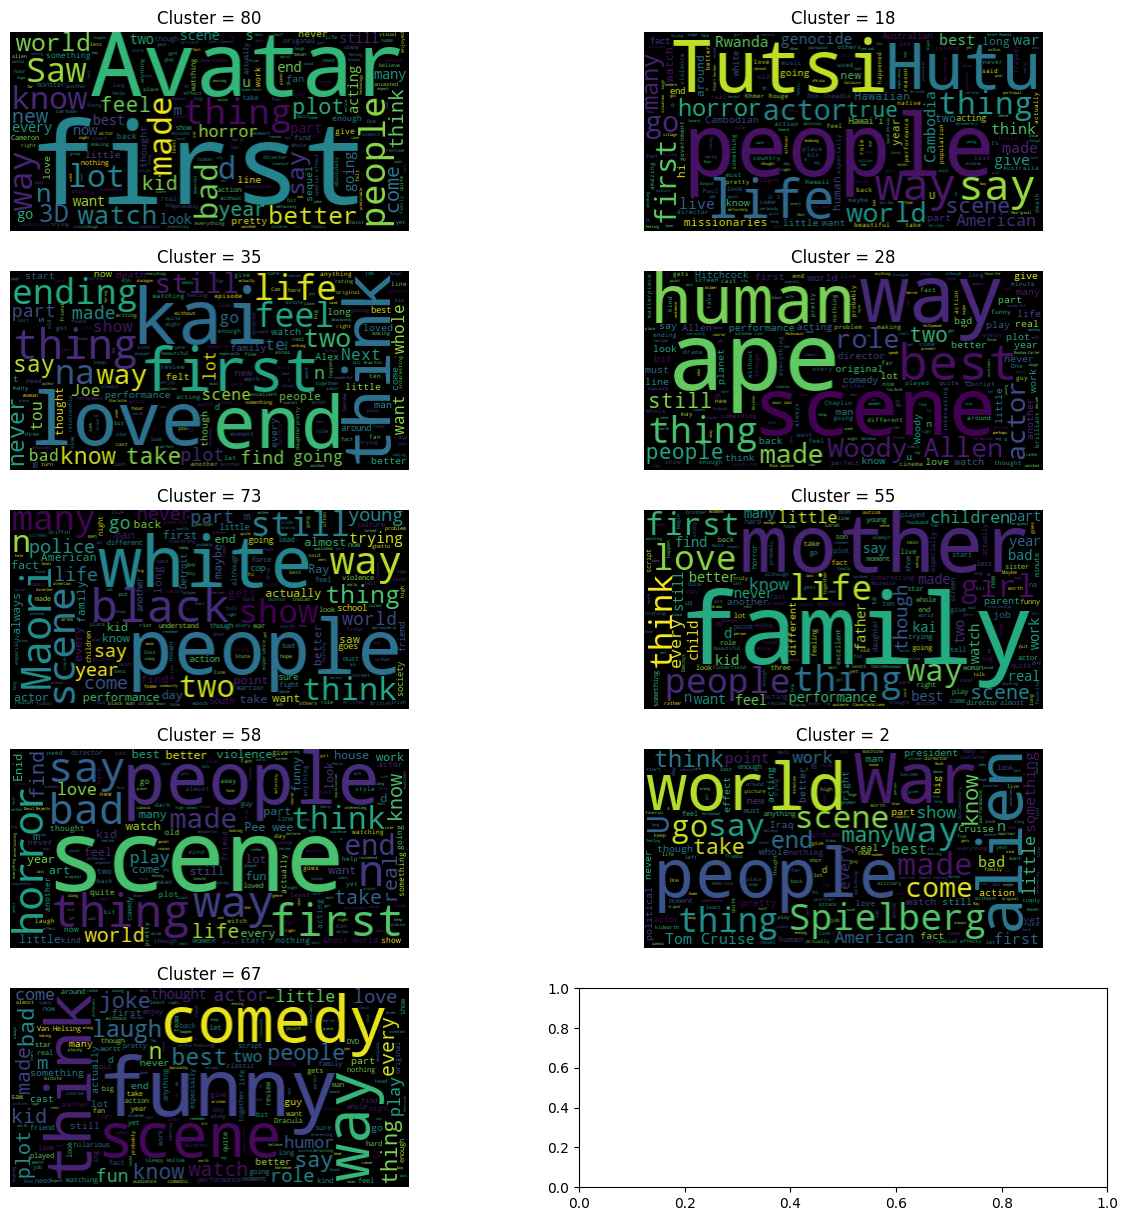

In [132]:
## Visualize wordclouds

rows = int(len(random_clusters)/2)
fig, axes = plt.subplots(rows,2,figsize=(15, 15))

for key, ax in zip(wordcloud_dict.keys(), axes.flatten()):
    ax.title.set_text(f"Cluster = {key}")
    ax.imshow(wordcloud_dict.get(key), interpolation='bilinear');
    ax.axis("off");

plt.pause(0.001)
plt.show()

### Final recommendation

Add the following words to stop words:
- one
- character
- story
- movie
- film
- book 
- novel
- good
- much
- really
- will
- see
- read

## Revised word clouds

In [93]:
wordcloud_revised = get_wordcloud(5)

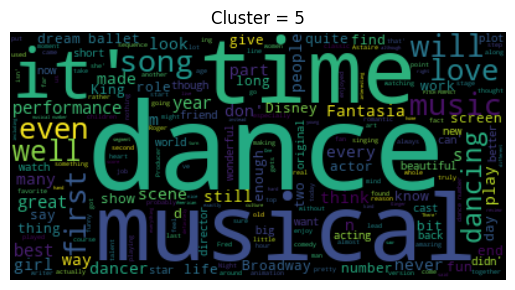

In [94]:
plt.title(f"Cluster = {5}")
plt.imshow(wordcloud_revised, interpolation='bilinear');
plt.axis("off");

In [133]:
X_cluster_details[X_cluster_details.clustering_label_bert==18]

,item_id_movie,is_movie,item_id_book,clustering_label_bert,vector,txt_new,title_movie
111,771.0,1.0,-1.0,18,"[-0.013907299377024174, 0.0014246966456994414,...",Documentary-like views of Kinshasa; This is me...,Life Is Rosy (a.k.a. Life Is Beautiful) (Vie e...
183,1299.0,1.0,-1.0,18,"[0.00509691284969449, 0.011700492352247238, -0...",Go search it out and watch a piece of truly ho...,"Killing Fields, The (1984)"
1123,27162.0,1.0,-1.0,18,"[0.01186435203999281, -0.006224117707461119, -...","was great, sucked!; Well I try to see as many ...",He Died With a Felafel in His Hand (2001)
1133,27402.0,1.0,-1.0,18,"[-0.08066221326589584, 0.021770449355244637, -...",Outstanding horrormovie from Stuart Gordon; Th...,Dagon (2001)
1160,30749.0,1.0,-1.0,18,"[-0.06266258656978607, 0.03343930467963219, -0...",Go see it!; This is a terrific movie. The perf...,Hotel Rwanda (2004)
1194,32781.0,1.0,-1.0,18,"[0.04906172305345535, -0.0560893639922142, -0....",It's OK; based on part of James Michener's mas...,Hawaii (1966)
1222,33838.0,1.0,-1.0,18,"[-0.0360589437186718, -0.012746088206768036, -...",history in the making; This is the birth of no...,Rize (2005)
1320,45578.0,1.0,-1.0,18,"[-0.01753939315676689, -0.028776876628398895, ...",Absolute Gem!!; What a movie. The first thing ...,"Earth Is a Sinful Song, The (Maa on syntinen l..."
1601,69666.0,1.0,-1.0,18,"[-0.0710483193397522, 0.012332282029092312, -0...",A terrific made by Aboriginal Australians...; ...,Samson and Delilah (2009)
1691,74504.0,1.0,-1.0,18,"[-0.0270228311419487, 0.037195075303316116, -0...",don't miss this film; Now here is a that every...,Letters to Father Jacob (Postia pappi Jaakobil...
